<center><h1>Credit Card Fraud Detection in R</h1></center>
<center><h3>Hemlata 15/05/2023</h3></center>

<div style="width:100%;text-align: center;"> <img align=middle src="https://www.pngmart.com/files/3/Credit-Card-PNG-Free-Download.png" alt="Heat beating" style="height:200px;"> </div>

<h3><b><center>Introduction</center></b></h3>

Credit card fraud is a major concern for financial institutions and consumers alike. Fraudulent transactions not only result in financial loses for banks, but can damage their reputation and lose the trust of customers. The increase in online transactions over the past decade has made real-time detection and prevention of financial fraud even more important.

A dataset has been provided that contains credit card transactions over a period of 2 days from September 2013. The dataset is highly unbalanced - containing 492 fraudulent transactions out of 284,807 total. To maintain anonymity and confidentiality, most of the original features have been transformed into principle components. Only the features time, class and amount have been preserved in their original form. 

This notebook represents an attempt to analyse the data within the dataset and recommend a model that could be used for a practical credit card fraud detection system. 

**Project Outline**

1. Importing libraries and dataset
2. Data Exploration 
3. Data Manipulation
4. Data Modelling
    - 4.1 Logistic Regression
    - 4.2 Naive Bayes Classifier 
    - 4.3 Decision Tree
5. Results and Limitations
6. Conclusion

#### **1. Importing libraries and dataset**

<a id="Importing libraries and dataset"></a>

In [1]:
library(tidyverse)
library(Hmisc)
library(caret)
library(ROSE)
library(ggplot2)
#library(gridExtra)
library(e1071)
library(corrplot)
library(broom)
library(party)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'Hmisc'


The following objects are masked from 'package:dplyr':

    src, summarize


The following objects are masked from 'package:base':

    format.pval, units


Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift


Loaded ROSE 0.0-4



Attaching package: 'e1071'


The following object is masked from 'package:Hmisc':

    impute


corrplot 0.95 loaded

Loading required pac

In [2]:
# Load the dataset

data <- read.csv('C:/Users/shank/OneDrive/Documents/creditcard.csv', stringsAsFactors = T)

In [3]:
str(data)

'data.frame':	284807 obs. of  31 variables:
 $ Time  : num  0 0 1 1 2 2 4 7 7 9 ...
 $ V1    : num  -1.36 1.192 -1.358 -0.966 -1.158 ...
 $ V2    : num  -0.0728 0.2662 -1.3402 -0.1852 0.8777 ...
 $ V3    : num  2.536 0.166 1.773 1.793 1.549 ...
 $ V4    : num  1.378 0.448 0.38 -0.863 0.403 ...
 $ V5    : num  -0.3383 0.06 -0.5032 -0.0103 -0.4072 ...
 $ V6    : num  0.4624 -0.0824 1.8005 1.2472 0.0959 ...
 $ V7    : num  0.2396 -0.0788 0.7915 0.2376 0.5929 ...
 $ V8    : num  0.0987 0.0851 0.2477 0.3774 -0.2705 ...
 $ V9    : num  0.364 -0.255 -1.515 -1.387 0.818 ...
 $ V10   : num  0.0908 -0.167 0.2076 -0.055 0.7531 ...
 $ V11   : num  -0.552 1.613 0.625 -0.226 -0.823 ...
 $ V12   : num  -0.6178 1.0652 0.0661 0.1782 0.5382 ...
 $ V13   : num  -0.991 0.489 0.717 0.508 1.346 ...
 $ V14   : num  -0.311 -0.144 -0.166 -0.288 -1.12 ...
 $ V15   : num  1.468 0.636 2.346 -0.631 0.175 ...
 $ V16   : num  -0.47 0.464 -2.89 -1.06 -0.451 ...
 $ V17   : num  0.208 -0.115 1.11 -0.684 -0.237 ...
 $ V

In [4]:
# Convert Class column into Factors

data$Class <- as.factor(data$Class)
levels(data$Class) <- c("Legit", "Fraud")

In [5]:
# function to set plot height and width
fig <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}

#### **2. Data Exploration**

<a id="Data Exploration"></a>

In [6]:
summary(data)

      Time              V1                  V2                  V3          
 Min.   :     0   Min.   :-56.40751   Min.   :-72.71573   Min.   :-48.3256  
 1st Qu.: 54202   1st Qu.: -0.92037   1st Qu.: -0.59855   1st Qu.: -0.8904  
 Median : 84692   Median :  0.01811   Median :  0.06549   Median :  0.1798  
 Mean   : 94814   Mean   :  0.00000   Mean   :  0.00000   Mean   :  0.0000  
 3rd Qu.:139321   3rd Qu.:  1.31564   3rd Qu.:  0.80372   3rd Qu.:  1.0272  
 Max.   :172792   Max.   :  2.45493   Max.   : 22.05773   Max.   :  9.3826  
       V4                 V5                   V6                 V7          
 Min.   :-5.68317   Min.   :-113.74331   Min.   :-26.1605   Min.   :-43.5572  
 1st Qu.:-0.84864   1st Qu.:  -0.69160   1st Qu.: -0.7683   1st Qu.: -0.5541  
 Median :-0.01985   Median :  -0.05434   Median : -0.2742   Median :  0.0401  
 Mean   : 0.00000   Mean   :   0.00000   Mean   :  0.0000   Mean   :  0.0000  
 3rd Qu.: 0.74334   3rd Qu.:   0.61193   3rd Qu.:  0.3986   3rd Qu

The majority of the data has undergone PCA, limiting the amount of information that can be obtained from most features. However, the "Amount" and "Class" features could provide some insight of the data.

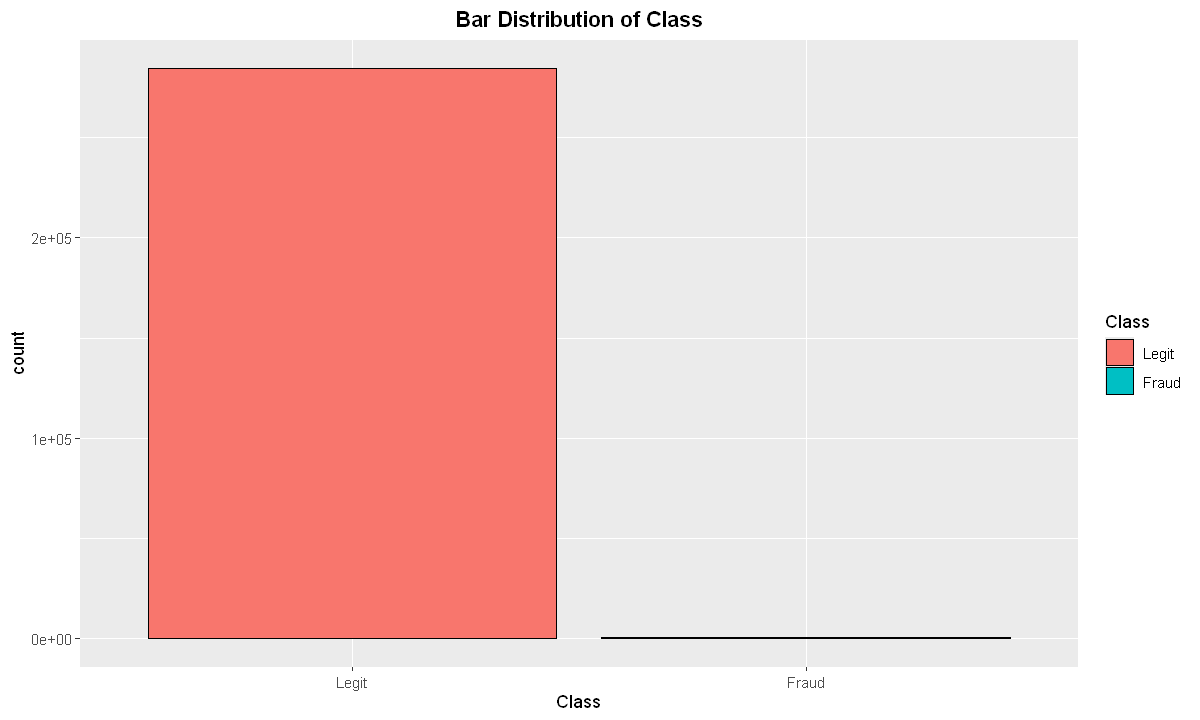

In [7]:
fig(10, 6)

ggplot(data, aes(x=Class, fill = Class)) + geom_bar(color = "black") + 
ggtitle("Bar Distribution of Class") + 
theme(plot.title = element_text(hjust = 0.5, face = "bold"))

In [8]:
counts <- table(data$Class)
result <- data.frame(table(data$Class), round(prop.table(counts), 5))
noms <- c("Class", "Value", "none", "Proportion")

names(result) <- noms

print(result[c(1,2,4)])

  Class  Value Proportion
1 Legit 284315    0.99827
2 Fraud    492    0.00173


* **Legit** cases constitute 99.8% (284315) of the dataset.
* **Fraud** cases constitute 0.2% (492)

As expected from the brief, analysis of the Class feature shows that the dataset is unbalanced and the vast majority of the cases are legitimate. Accuracy will not be an appropriate measure of performance here and AUC will be used instead.

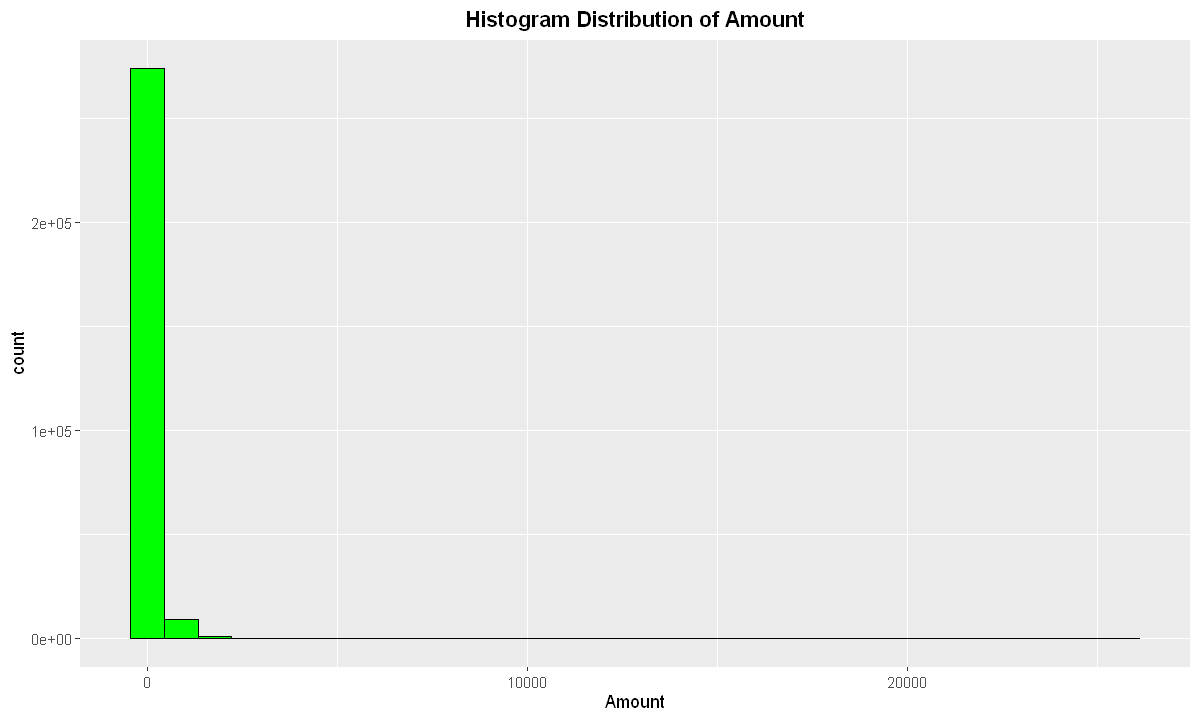

In [9]:
fig(10,6)

p <- ggplot(data, aes(x=Amount)) + geom_histogram(fill = "green", color = "black", bins = 30) + 
ggtitle("Histogram Distribution of Amount") + theme(plot.title = element_text(hjust = 0.5, face = "bold")) 

p 


In [10]:
# Function to find range of outliers in Amount

find_outlier_range <- function(x){
    outliers <- boxplot.stats(x)$out
    return(range(outliers))
}

find_outlier_range(data$Amount)

[1]   184.52 25691.16

The histogram above shows that the vast majority of the transactions have low values. However, there are a non-neglible number of outliers with values ranging from 184.52 up to 25691.16 dollars. There is clearly a positive skew in the feature that will need to be considered during feature selection and modelling.

#### **3. Data Manipulation**

<a id="Data Manipulation"></a>

In [11]:
# Check for missing values

colSums(is.na(data))
sum(is.na(data))

Time     V1     V2     V3     V4     V5     V6     V7     V8     V9    V10 
     0      0      0      0      0      0      0      0      0      0      0 
   V11    V12    V13    V14    V15    V16    V17    V18    V19    V20    V21 
     0      0      0      0      0      0      0      0      0      0      0 
   V22    V23    V24    V25    V26    V27    V28 Amount  Class 
     0      0      0      0      0      0      0      0      0

[1] 0

There are no missing values in the dataset.

In [12]:
# Check for duplicate rows

sum(duplicated(data))

# Remove any duplicate rows

data <- distinct(data)

[1] 1081

There are 1081 duplicate rows in the dataset which can be removed.

Also the Time feature can be removed as each value is unique and provides no predictive power.

In [13]:
data$Time <- NULL

In [14]:
# Standardise Amount feature

data$Amount <- scale(data$Amount)

summary(data$Amount)

       V1           
 Min.   : -0.35333  
 1st Qu.: -0.33096  
 Median : -0.26547  
 Mean   :  0.00000  
 3rd Qu.: -0.04378  
 Max.   :102.24738  

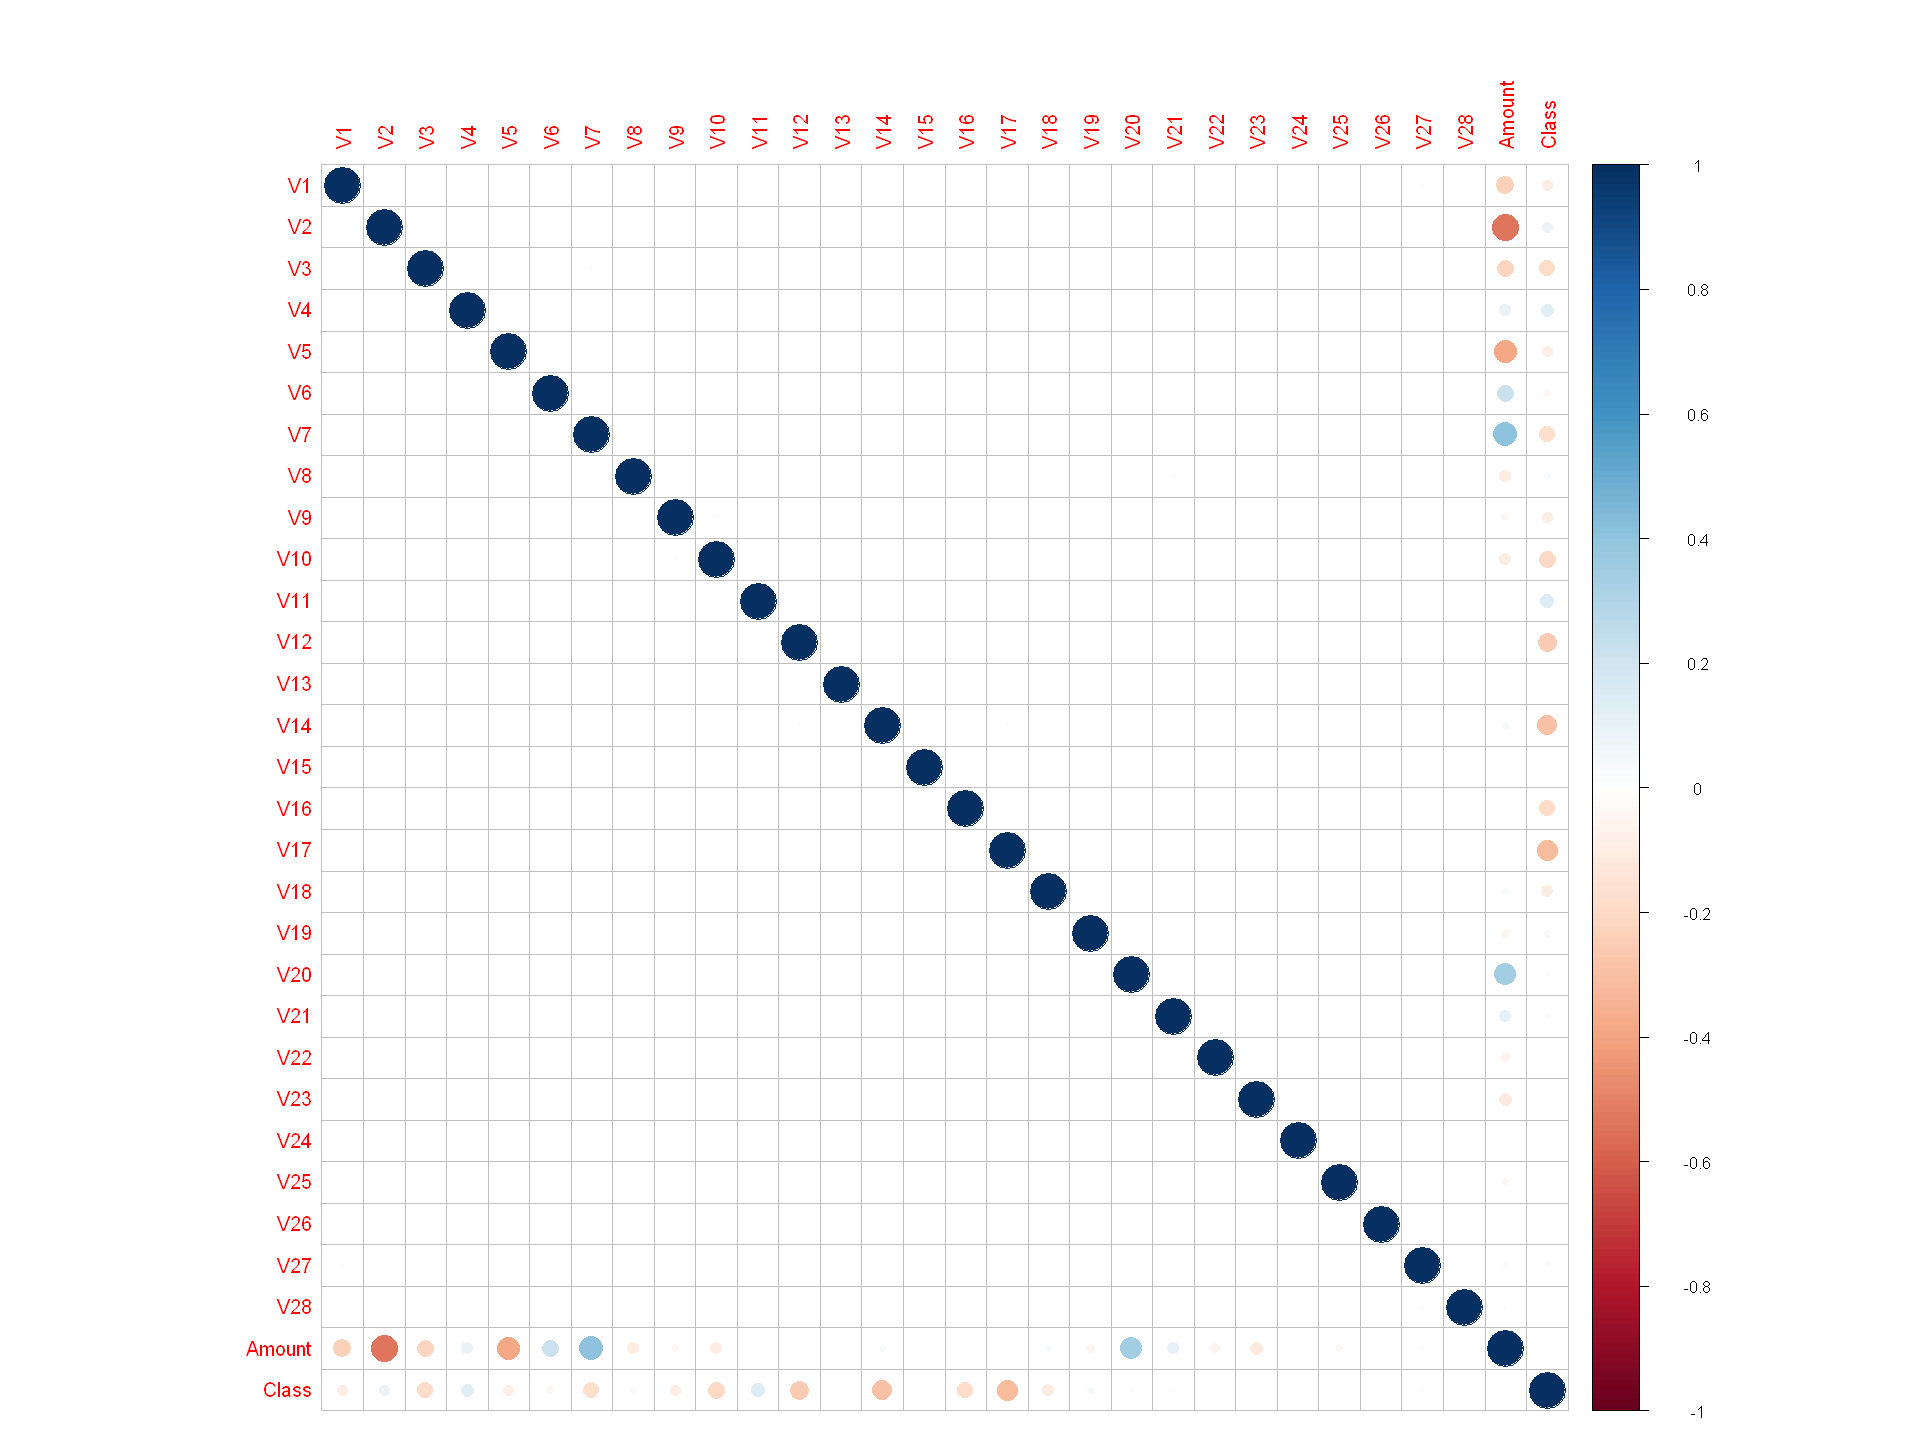

In [15]:
fig(16,12)

data2 <- data

data2$Class <- as.numeric(data2$Class)

corr <- cor(data2[], method = "pearson")

corrplot(corr)

As the data has previously gone through PCA, there is little to no correlation between most of the features. Correlation between the target variable and the PCA features varys with no particular features standing out. 

#### **4. Data Modelling**

<a id="Data Modelling"></a>


The dataset will be split for training and testing, with 80% of the data used for training and 20% used for testing. The seed will also be set to reproduce results.

In [16]:
set.seed(123)

indices <- createDataPartition(data$Class, p=0.8, list = F)
trainData <- data[indices,]
testData <- data[-indices,]

We are going to be building using the following models: 

* Logistic Regression
* Naive Bayes Classifier
* Decision Tree

**4.1 Logistic Regression**

<a id="Logistic Regression"></a>

In [17]:
model_lr <- glm(Class ~ ., data = trainData, family = "binomial")

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Area under the curve (AUC): 0.983

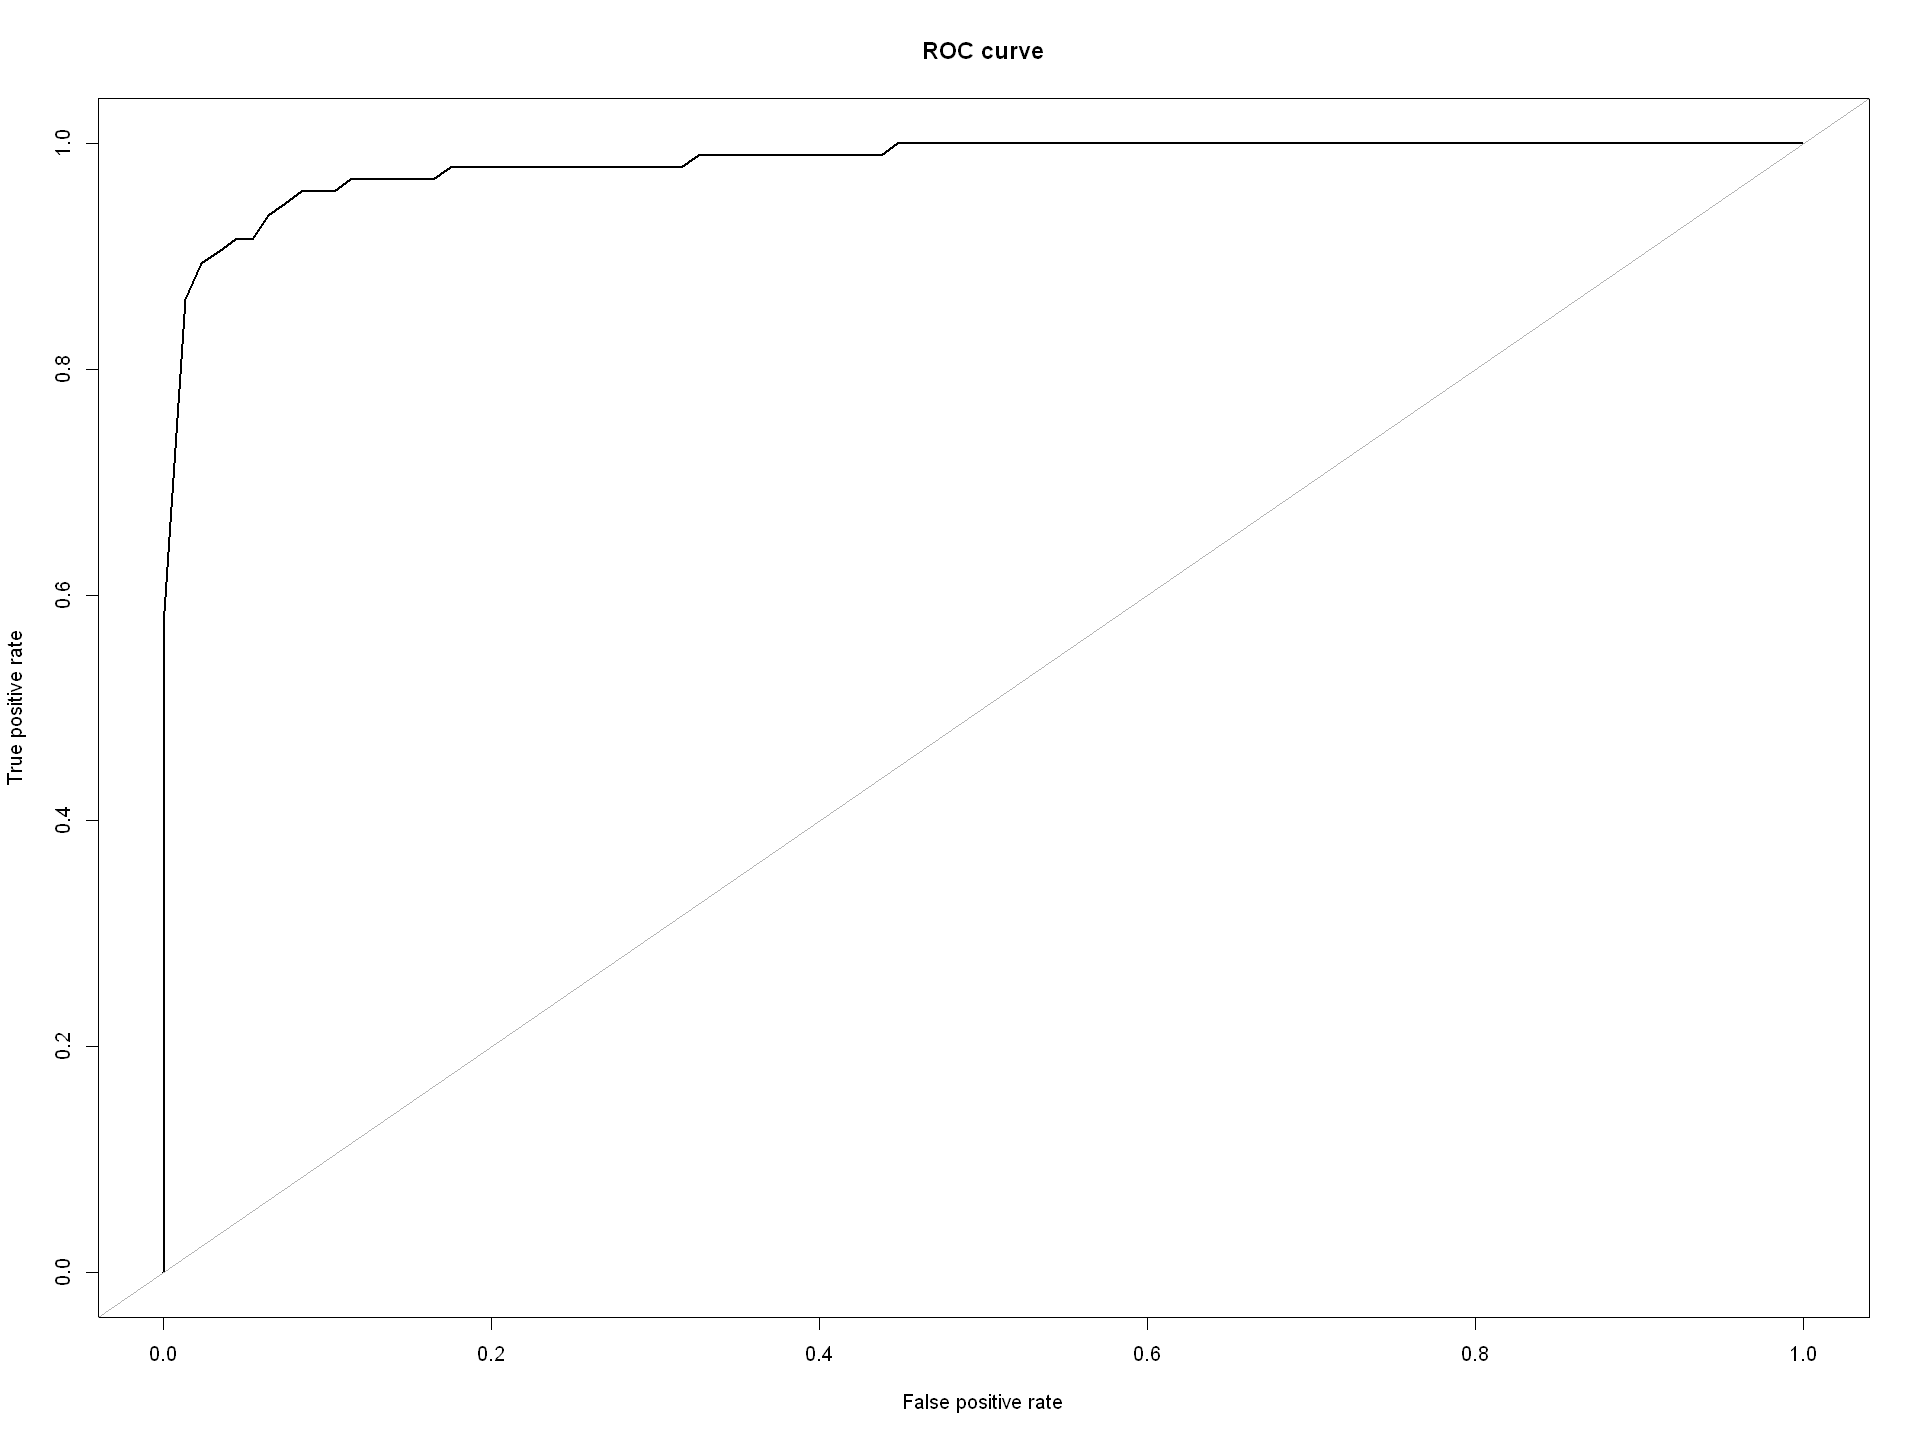

In [18]:
model_lr_prediction <- predict(model_lr, newdata = testData, type = 'response') 

roc.curve(testData$Class, model_lr_prediction, plotit = TRUE)

**4.2 Naive Bayes Classifier**

<a id="Naive Bayes Classifier"></a>

In [19]:
NBmodCCF <- naiveBayes(Class ~ ., data = trainData, laplace = 1) 

Area under the curve (AUC): 0.877

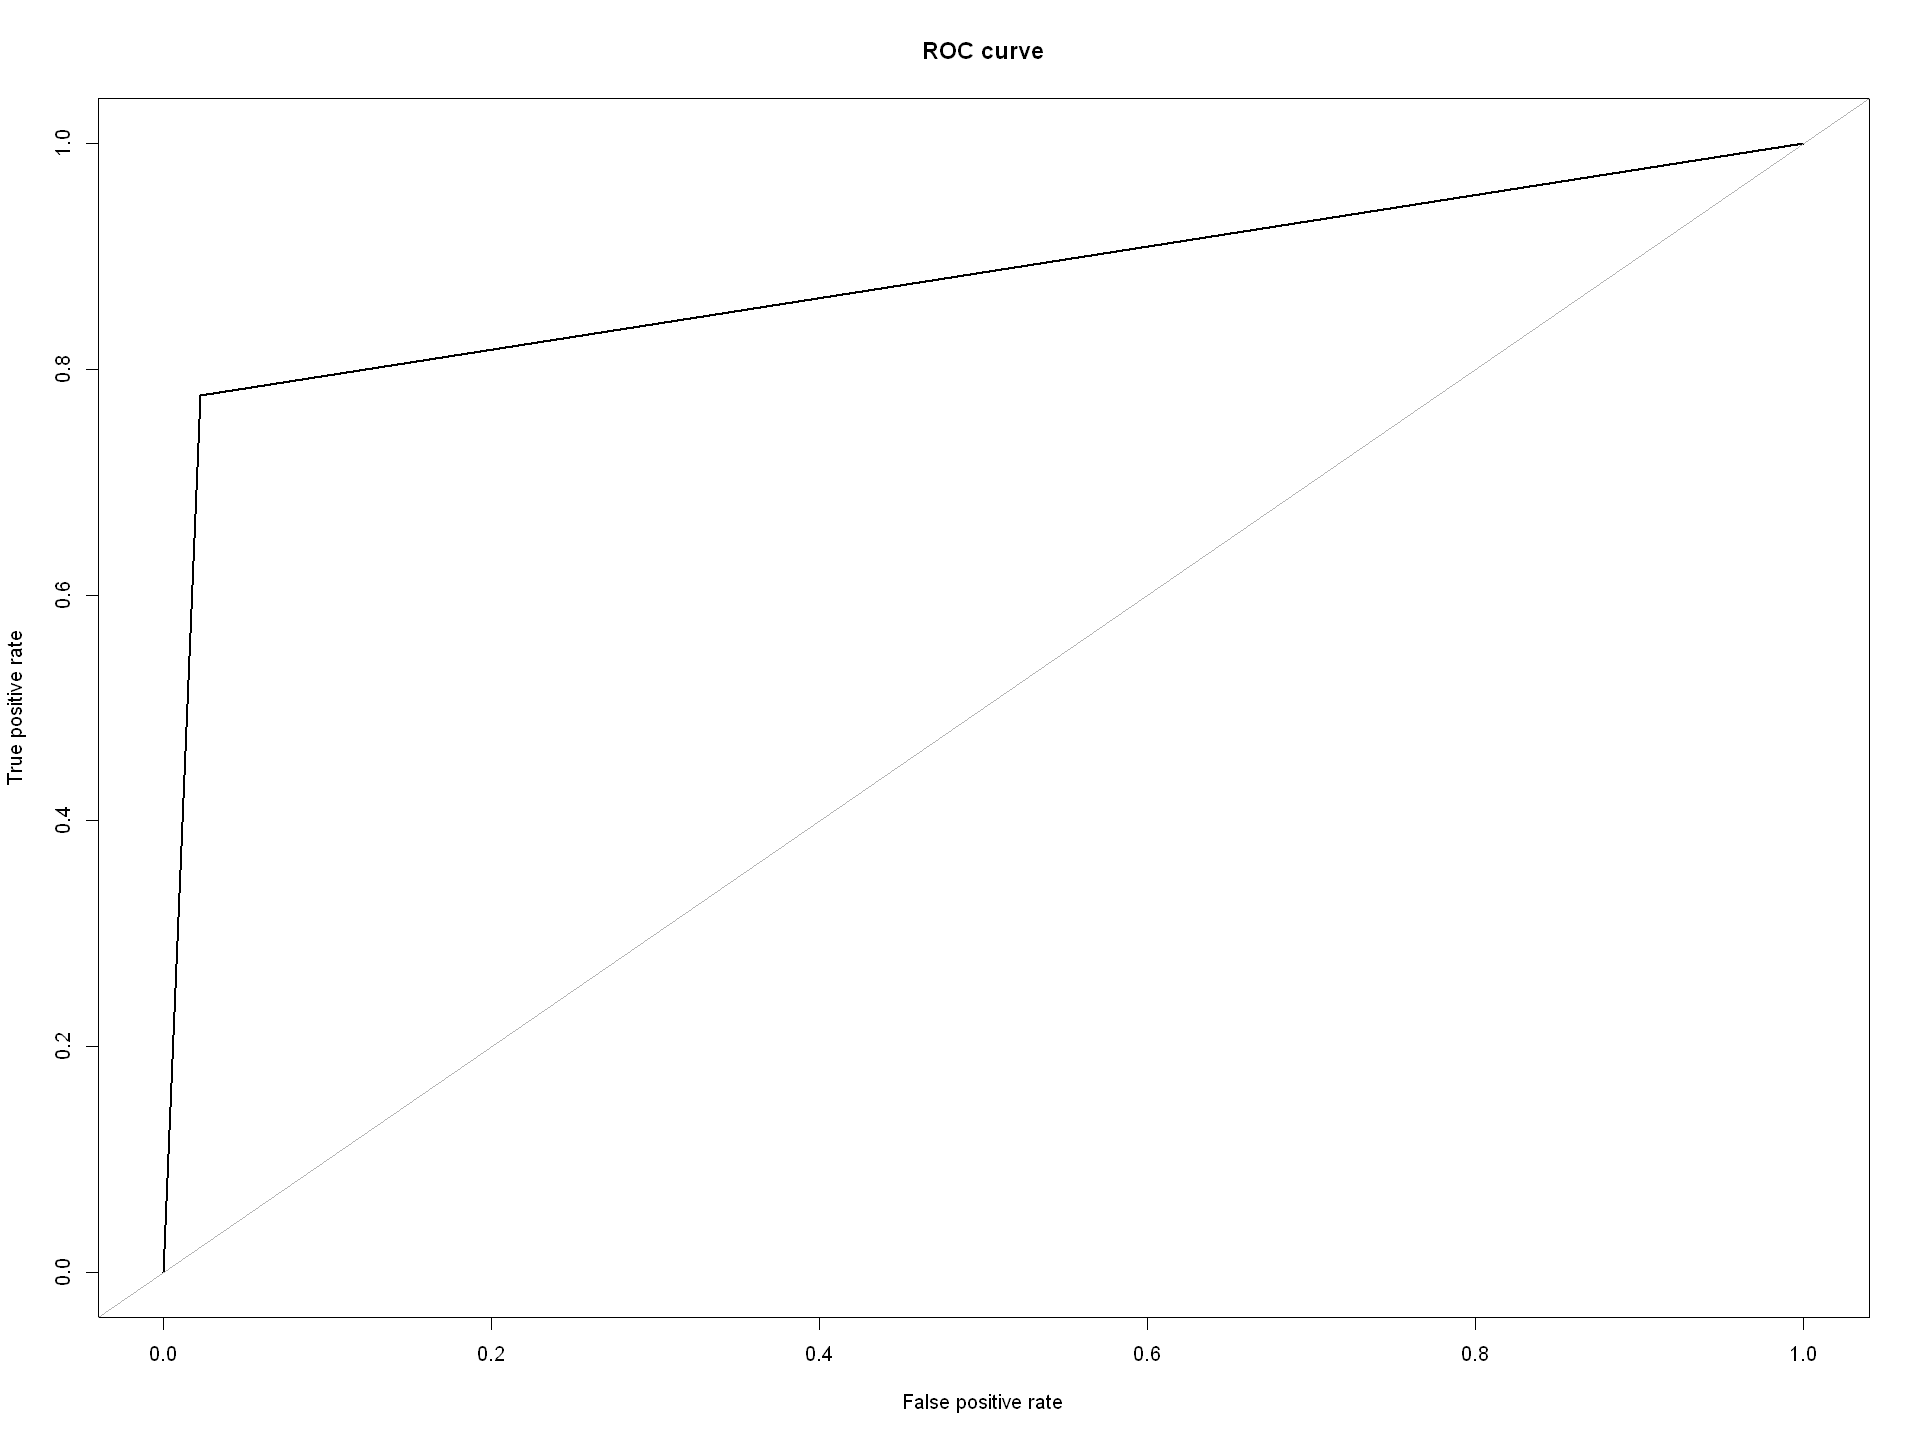

In [20]:
model_nb_prediction <- predict(NBmodCCF, newdata = testData, type = "class")

roc.curve(testData$Class, model_nb_prediction, plotit = TRUE)

**4.3 Decision Tree**

<a id="Decision Tree"></a>

In [21]:
set.seed(123)

DTmodCCF <- ctree(Class ~ .,
                 data=trainData)

Area under the curve (AUC): 0.856

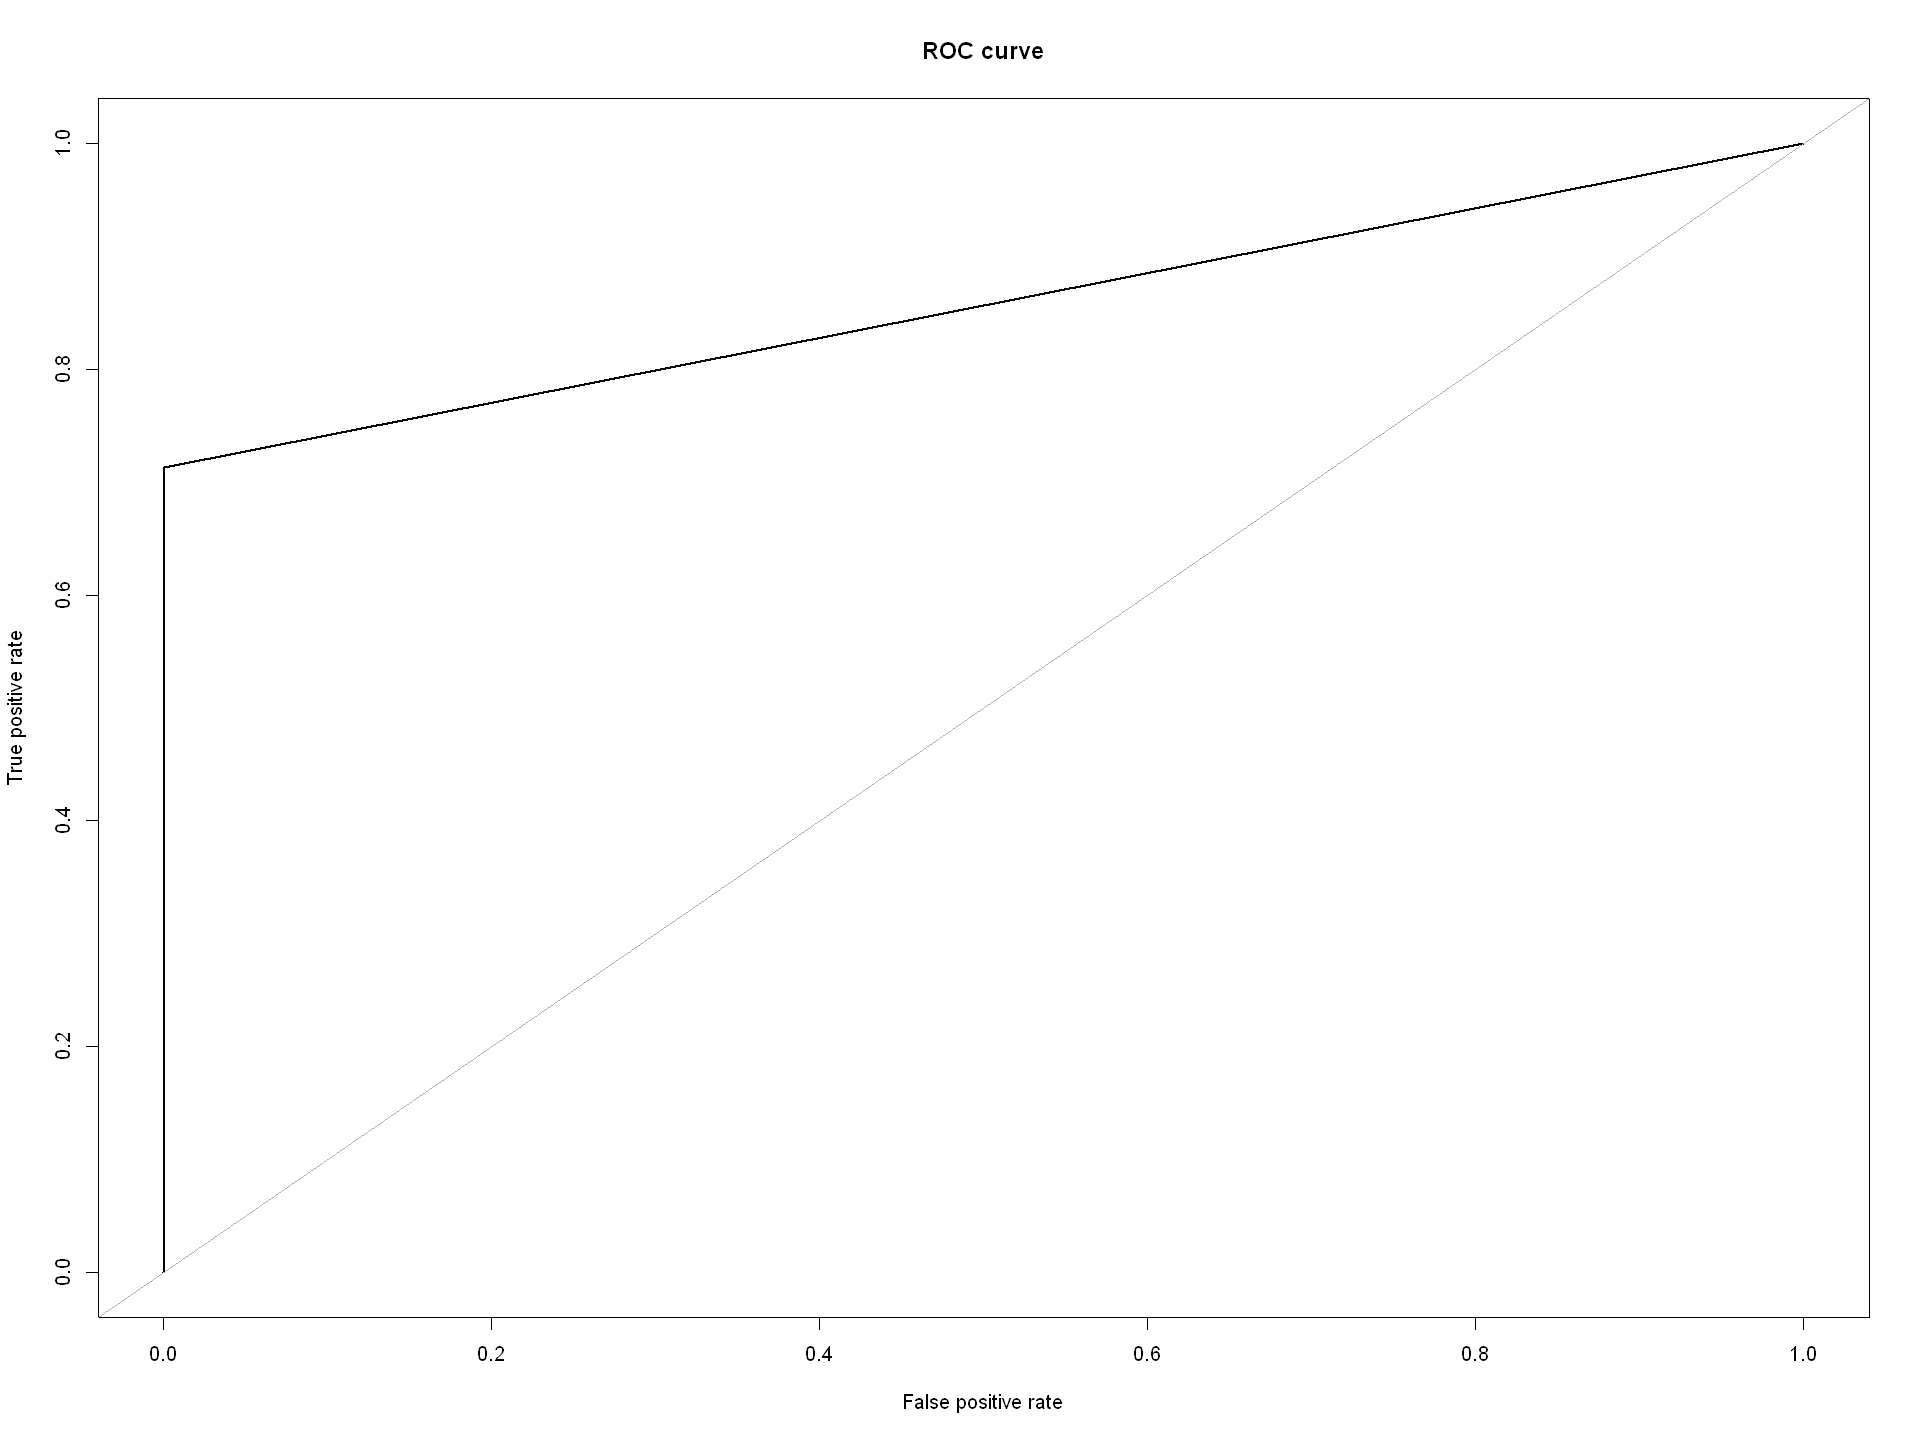

In [22]:
model_ctree_prediction <- predict(DTmodCCF, newdata = testData, type = "response")

roc.curve(testData$Class, model_ctree_prediction, plotit = TRUE)

#### **5. Results and Limitations**

<a id="Results and Limitations"></a>

The AUC performance results for the 3 models are as follows:

- Logistic Regression: 0.983
- Naive Bayes Classifier: 0.877
- Decision Tree: 0.856

Although the naive bayes classifier and decision tree performed well, logistic regression is the clear winner in this group. 

There are some limitations of the project that may be addressed in the future that may change the outcome. These would include:

- Use of only 3 modelling techniques. If we add more modelling types in the future, there may be a model that performs even better than the LR model.
- Lack of different sampling techniques. This is something I will learn more about and add to future projects. 

### **6. Conclusion**

<a id="Conclusion"></a>

In conclusion, this project aimed to develop machine learning models to detect credit card fraud. Three models were evaluated: Logistic Regression, Naive Bayes Classifier, and Decision Tree. The results showed that the Logistic Regression model achieved the highest AUC score of 0.983, while the Naive Bayes Classifier and Decision Tree models achieved AUC scores of 0.877 and 0.856, respectively.

The high AUC score of the Logistic Regression model indicates that it is able to accurately distinguish between fraudulent and non-fraudulent transactions with a high degree of confidence. Both the Naive Bayes Classifier and Decision Tree models also demonstrated good performance, with AUC scores of 0.877 and 0.856.

However, it is important to note that there are some limitations to the project, including the use of only three modeling techniques and the lack of different sampling techniques. These limitations could be addressed in future work to improve the performance of the models.

Overall, the results of this project demonstrate the potential of machine learning models in detecting credit card fraud, and highlight the importance of continued research and development in this field. With the increasing prevalence of credit card fraud, it is essential to develop accurate and efficient methods for detecting and preventing fraud. This project provides a starting point for further research in this area, and offers insights into the potential of machine learning models for detecting credit card fraud.